In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import category_encoders as ce

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

random.seed(4)

In [2]:
csv = pd.read_csv('allegro-api-transactions.csv')
df = csv.copy()

In [3]:
sorted(df['it_location'].unique())
#Dużo powtórek 

[' \tWarszawa,Wrocław,Częstochowa',
 '    *',
 '    Dzierżoniów',
 '  WARSZAWA JANKI',
 ' - Ząbki  koło Warszawy',
 ' 18 Miast i Wysyłkowo CAŁA POLSKA',
 ' @',
 ' Cały Kraj',
 ' Chotomów',
 ' Częstochowa',
 ' DĘBICA',
 ' Garwolin',
 ' Gliwice',
 ' Gniezno',
 ' JASIENICA RUDZICA',
 ' Jordanów',
 ' KNURÓW / RYBNIK',
 ' Karpicko k/Wolsztyna',
 ' Koluszki/Łódź/Brzeziny',
 ' Koszalin "CudaWianki" Drzymały 1',
 ' Koźniewice, Radomsko, Końskie',
 ' Kraków',
 ' Kraków - Ochojno ul. Staropolska 2',
 ' LESZNO ',
 ' Lublin',
 ' Myślenice - Siepraw ul Myślenicka ',
 ' Opoczno-Tomaszów Maz',
 ' PL',
 ' POLSKA, Białystok Witosa 25 lok.24',
 ' Pisz',
 ' Polska',
 ' Raszówek',
 ' Rzeszów',
 ' SPRZED.WYSYŁK',
 ' Siewierz',
 ' Sosnowiec Będzin Asia 502 94 14 44',
 ' Sosnowiec,Katowice-SKLEP /GAMES4YO',
 ' Tarnowskie Góry',
 ' Tbg',
 ' Warszawa',
 ' Warszawa Katowice Kraków',
 ' Wieluń',
 ' Wlkp',
 ' Wrocław',
 ' Wrocław, ul. Piękna 62ab lok. 10',
 ' Węgrów, Biała Podlaska',
 ' Zebrzydowice',
 ' Zielona 

In [4]:
df["it_location"] = df["it_location"].apply(str.lower)

In [5]:
encoder = ce.TargetEncoder()

In [6]:
df['it_location'] = encoder.fit_transform(df['it_location'], df['price'])
df

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,84.132898,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,84.132898,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,64.883187,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,35.433365,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,73.772916,"Odzież, Obuwie, Dodatki"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,26.346402,RTV i AGD
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,63.645927,Uroda
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,18.682800,"Odzież, Obuwie, Dodatki"
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,104.254805,Dla Dzieci


In [7]:
#Dla każdej unikalnej wartości oblicza prawdopodobieństwo spełnienia targetu

#Dużą zaletą target encoding jest nie zwiększanie ilości kolumn w ramce danych
#Dużą wadą jest jednak możliwość przypisania takiego samego encodingu różnym wartościom

In [8]:
one_hot = ce.OneHotEncoder()
oh = one_hot.fit_transform(df['main_category'])
oh
#df.join i usunąć kolumne main_category

,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,main_category_6,main_category_7,main_category_8,main_category_9,main_category_10,...,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,main_category_26,main_category_27
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420016,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
420017,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420018,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
ordinal = ce.OrdinalEncoder()
od = ordinal.fit_transform(df['main_category'])
od
#kolejnym unikalnym wartościom przypisane kolejne liczby naturalne

,main_category
0,1
1,2
2,3
3,4
4,2
...,...
420015,6
420016,9
420017,2
420018,8


In [10]:
one_hot = ce.LeaveOneOutEncoder()
lv = one_hot.fit_transform(df['main_category'], df['price'])
lv
#podobny do target encoding, ale nie uwzględnia targetu aktualnego wiersza przy obliczaniu średniej targetu kategorii, co pomaga przy outlinerach

,main_category
0,121.814331
1,75.859357
2,72.434342
3,25.028061
4,75.859080
...,...
420015,107.530709
420016,28.129044
420017,75.859337
420018,71.203327


(array([159790.,  37721.,  88048.,  75433.,  14220.,  26890.,   9345.,
          3811.,   3427.,   1335.]),
 array([ 1. ,  3.6,  6.2,  8.8, 11.4, 14. , 16.6, 19.2, 21.8, 24.4, 27. ]),
 <BarContainer object of 10 artists>)

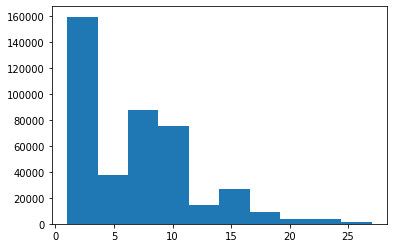

In [11]:
plt.hist(od)

(array([  6576.,  47742.,  32622.,   5808., 133150.,  80139.,  27532.,
         21555.,  14698.,  50198.]),
 array([  1.        ,  15.69018061,  30.38036122,  45.07054183,
         59.76072243,  74.45090304,  89.14108365, 103.83126426,
        118.52144487, 133.21162548, 147.90180608]),
 <BarContainer object of 10 artists>)

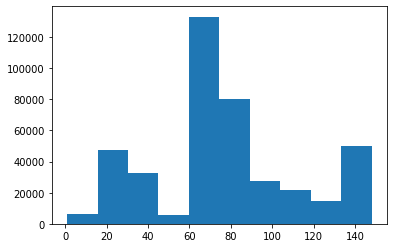

In [12]:
plt.hist(lv)

# Uzupełnianie braków

In [13]:
csv

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,Kraśnik,RTV i AGD
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,Dzierżoniów,Uroda
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,Supraśl,"Odzież, Obuwie, Dodatki"
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,Poznań,Dla Dzieci


In [14]:
df = csv.copy()[['price', 'it_seller_rating', 'it_quantity']].sample(10000)
pom = df["it_seller_rating"].copy()
pom2=df["it_quantity"].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 405565 to 86413
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             10000 non-null  float64
 1   it_seller_rating  10000 non-null  int64  
 2   it_quantity       10000 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 312.5 KB


In [15]:
ratings =[0]*10
for i in range(10):
    df["it_seller_rating"] = pom.sample(frac=0.9)
    imputer = KNNImputer(n_neighbors=2, weights="uniform")
    aprox = pd.DataFrame(imputer.fit_transform(df))

    ratings[i] = mean_squared_error(aprox[1], pom, squared=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 405565 to 86413
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             10000 non-null  float64
 1   it_seller_rating  9000 non-null   float64
 2   it_quantity       10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 312.5 KB


In [16]:
ratings

[13049.69688269904,
 13650.186528973696,
 13966.396191905591,
 14661.260013498159,
 13970.547972660199,
 13422.46962207123,
 13432.769785649198,
 13833.890620178945,
 15377.658541375862,
 13095.848182320036]

In [17]:
np.std(ratings)

680.1534615671999

In [18]:
ratings2 =[0]*10
for i in range(10):
    df["it_seller_rating"] = pom.sample(frac=0.9)
    df["it_quantity"] = pom2.sample(frac=0.9)
    imputer = KNNImputer(n_neighbors=2, weights="uniform")
    aprox = pd.DataFrame(imputer.fit_transform(df))

    ratings2[i] = mean_squared_error(aprox[1], pom, squared=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 405565 to 86413
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             10000 non-null  float64
 1   it_seller_rating  9000 non-null   float64
 2   it_quantity       9000 non-null   float64
dtypes: float64(3)
memory usage: 312.5 KB


In [19]:
ratings2

[13900.626028888051,
 13469.642337269019,
 13751.112092070955,
 13736.95355283241,
 13830.461681948655,
 15175.424565628304,
 14189.301788041757,
 14529.213798222187,
 13624.860657941606,
 15148.59113119187]

In [20]:
np.std(ratings2)

585.2032335291108

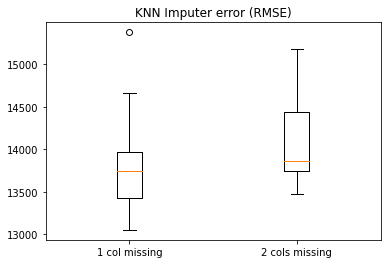

In [21]:
fig1, ax1 = plt.subplots()
ax1.boxplot([ratings,ratings2])
ax1.set_xticklabels(["1 col missing","2 cols missing"])
plt.title("KNN Imputer error (RMSE)")
plt.show()

In [22]:
#Większe braki danych powodują większy błąd i jego rozrzut w "zgadywaniu" brakujących wartości